### Day_016 : MODEL IMPROVEMENT & COMPARISON
***Today's Goal:*** Train multiple models - Compare performance - Choose the best one

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data 
df = pd.read_csv('clean_netflix_data.csv')
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,6.6,2279.0,0.600,6.9
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],0.0,8.1,391942.0,95.337,7.7


In [3]:
# Select Final Features
y = df['imdb_score']
X = df.drop([
    'imdb_score',
    'id',
    'title',
    'description',
], axis=1)

# Convert ALL categorical columns at once
X = pd.get_dummies(X, drop_first=True)

# Remove Boolean Type
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Train Test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:",mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.6861872849813166
RMSE: 0.8330404519460435
R2 Score: 0.23402610664833834


#### Train a Random Forest Model

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
y_pred_rf = rf.predict(X_test)

#### Evaluate

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("RF MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RF RMSE:", mean_squared_error(y_test, y_pred_rf))
print("RF R2:", r2_score(y_test, y_pred_rf))

RF MAE: 0.5185667527993111
RF RMSE: 0.5482149095607235
RF R2: 0.4959208671215227


### Train Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [23]:
y_pred_gb = gb.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("RF MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RF RMSE:", mean_squared_error(y_test, y_pred_gb))
print("RF R2:", r2_score(y_test, y_pred_gb))

RF MAE: 0.5407728908741388
RF RMSE: 0.543548576189998
RF R2: 0.5002115225528425


#### Compare All Models

| Model             | MAE | RMSE | R² |
| ----------------- | --- | ---- | -- |
| Linear Regression |0.68 | 0.83 |0.23|
| Random Forest     |0.51 | 0.54 |0.49|
| Gradient Boosting |0.54 | 0.54 |0.50|

- Best model = Highest R², Lowest RMSE

#### Best Model = Gradient Boosting
- Among the tested models, Gradient Boosting Regressor performed best with the highest R² score and competitive error metrics, making it the most suitable model for predicting IMDb ratings.

### Feature Importance 
- What most affects movie ratings

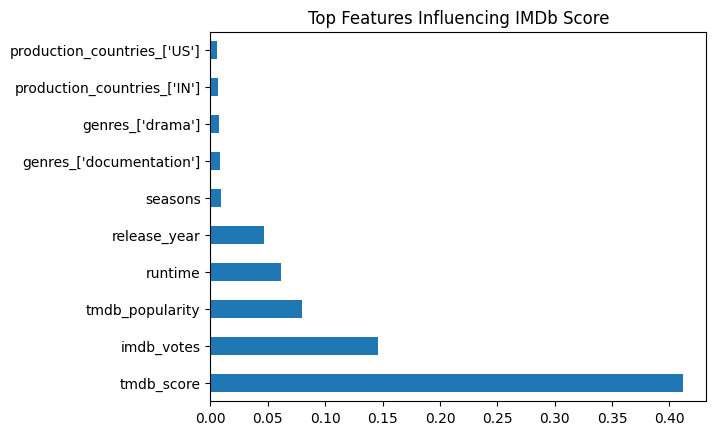

In [26]:
import pandas as pd

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top Features Influencing IMDb Score")
plt.show()


#### Learnings
- rained multiple regression models to predict IMDb scores and compared their performance using MAE, RMSE, and R² metrics.
- Understood that tree-based models like Random Forest and Gradient Boosting handle complex, non-linear data better than Linear Regression.
- Identified Gradient Boosting as the best-performing model based on the highest R² score.
- Learned how model evaluation helps in selecting the most suitable algorithm for a prediction task.
- Gained practical experience in moving from a baseline model to improved model selection.